In [1]:
 !pip install transformers

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx


In [5]:
df=pd.read_excel('/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15728 entries, 0 to 15727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15728 non-null  int64 
 1   Data        15728 non-null  object
 2   Label       15728 non-null  int64 
 3   Token       15728 non-null  object
 4   Token_ID    15728 non-null  object
dtypes: int64(2), object(3)
memory usage: 614.5+ KB


In [6]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 KB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) 

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [9]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Token'].tolist()
y_test=test['Label'].tolist()

In [10]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [11]:
categories = [0,1,2]

In [12]:
model_name = 'monsoon-nlp/bangla-electra'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

In [13]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


Downloading:   0%|          | 0.00/161 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 37
	99percentile : 47


In [14]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/54.1M [00:00<?, ?B/s]

In [15]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [16]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(3)}

In [17]:
learner.fit_onecycle(2e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1049/1049 [==============================] - 85s 60ms/step - loss: 1.0985 - accuracy: 0.3403 - val_loss: 1.0956 - val_accuracy: 0.4177
Epoch 2/10
1049/1049 [==============================] - 59s 56ms/step - loss: 1.0908 - accuracy: 0.4047 - val_loss: 1.0828 - val_accuracy: 0.4100
Epoch 3/10
1049/1049 [==============================] - 60s 57ms/step - loss: 1.0581 - accuracy: 0.4719 - val_loss: 0.9952 - val_accuracy: 0.5353
Epoch 4/10
1049/1049 [==============================] - 60s 57ms/step - loss: 0.9992 - accuracy: 0.5423 - val_loss: 0.9463 - val_accuracy: 0.5702
Epoch 5/10
1049/1049 [==============================] - 60s 57ms/step - loss: 0.9570 - accuracy: 0.5735 - val_loss: 0.9161 - val_accuracy: 0.5772
Epoch 6/10
1049/1049 [==============================] - 61s 58ms/step - loss: 0.9191 - accuracy: 0.5917 - val_loss: 0.9156 - val_accuracy: 0.5861
Epoch 7/10
1049/1049 [==============================] - 59s 5

In [18]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.42      0.41      0.42       380
           1       0.69      0.63      0.66       623
           2       0.63      0.70      0.66       570

    accuracy                           0.60      1573
   macro avg       0.58      0.58      0.58      1573
weighted avg       0.60      0.60      0.60      1573



array([[156, 105, 119],
       [113, 392, 118],
       [100,  73, 397]])

In [19]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [20]:
y_pred = predictor.predict(x_test)
print(y_pred)

[1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.40      0.41       364
           1       0.73      0.69      0.71       659
           2       0.62      0.69      0.66       550

    accuracy                           0.62      1573
   macro avg       0.59      0.59      0.59      1573
weighted avg       0.62      0.62      0.62      1573



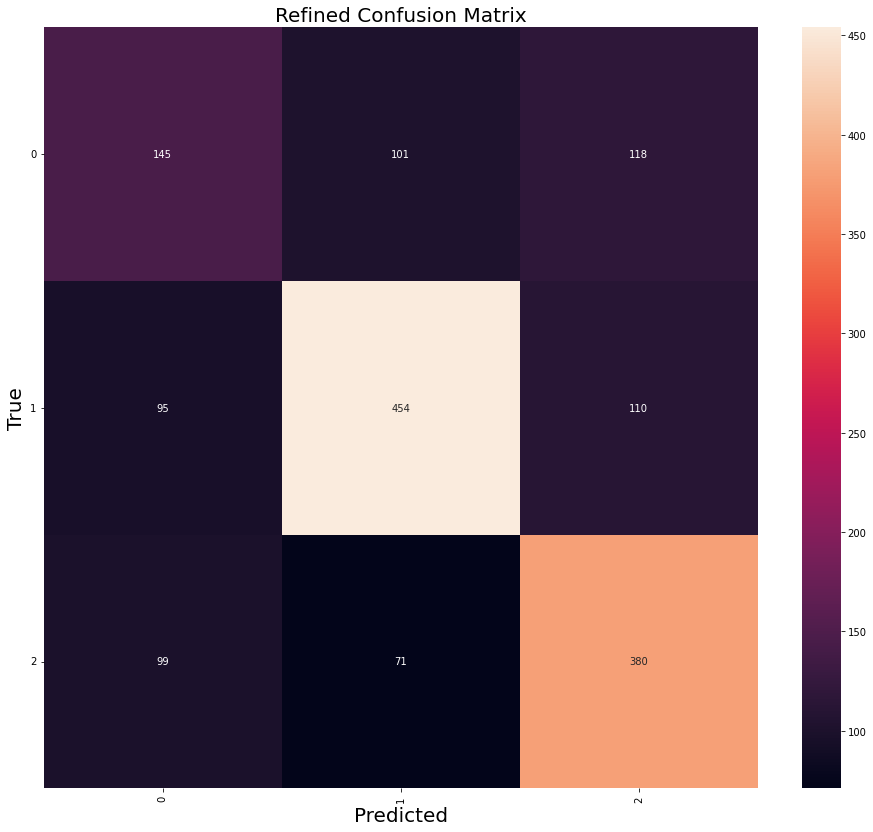

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)


cm = confusion_matrix(y_test, y_pred)

## Get Class Labels
labels = 3
#[0,1,2,3,4,5]_
class_names = categories 

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()
